# Bank Customer Segmentation

Here I have attempted to segment a bank's customers based on various credit card related details, and purchase history. Such segmentation is helpful for the marketing team to customize the marketing efforts to target specifc customer segments.

Original dataset is provided at Kaggle: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


### Linking to my google drive for uploading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries

In [3]:
# Data import and manipulation

import pandas as pd
import numpy as np

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Creating a Pandas dataframe from the csv data for easy handling and visualization

creditcard_df = pd.read_csv('/content/drive/MyDrive/for GitHub/Business_Analytics_Clustering/Bank_Customer_Segmentation.csv')

In [5]:
# checking the top 5 rows and column headings in the dataframe

creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Brief description of the various features columns

* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Some insights from the info above
*   total 18 features (incldiuing Cust_ID). Only Cust_ID is "object" type, others are numerical
* total 8950 rows (ie customer accounts)




In [7]:
# To verify if any null values in any features

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

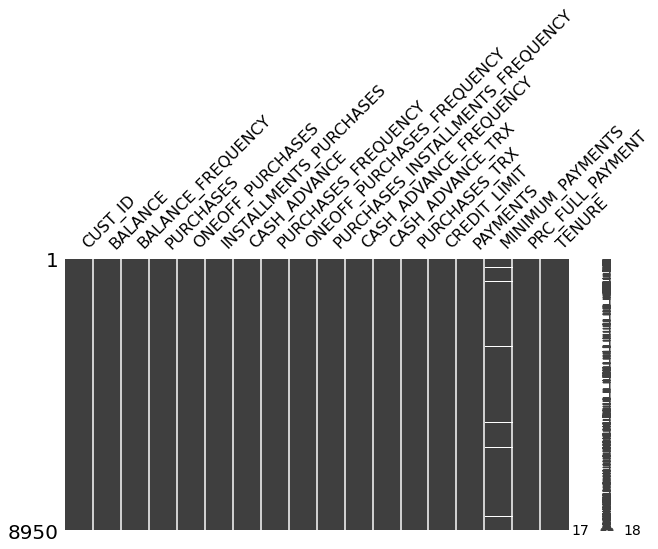

In [8]:
# Features with null values can also be idenfited by plotting the following graph
import missingno as msno
msno.matrix(creditcard_df, figsize=(10, 5)) 
# Alternately sns heatmap can be plotted: sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

### Above shows missing data in "MINIMUM_PAYMENTS", which was expected giviven 313 null values in this column. But it is strange that "CREDIT_LIMIT" which has 1 missing value dont show up in the plot above

In [9]:
# Checking the sole row for which "CREDIT_LIMIT" is null

creditcard_df[creditcard_df['CREDIT_LIMIT'] == np.nan]

# 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


<Axes: >

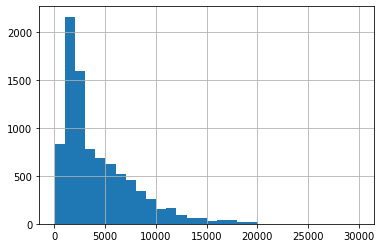

In [10]:
# Nothing shows up in the above (ie. an empty row). Even so, checking the distribution histogram of 'CREDIT_LIMIT'

creditcard_df['CREDIT_LIMIT'].hist(bins=30)

In [11]:
# Above is a skewed distribution. Filling the missing values with Mode

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mode()[0]

<Axes: >

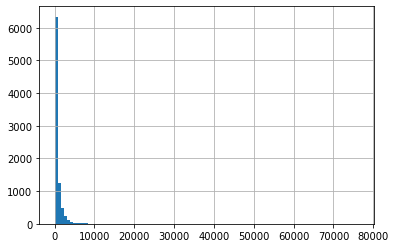

In [12]:
# Checking the distribution histogram of 'MINIMUM_PAYMENTS'

creditcard_df['MINIMUM_PAYMENTS'].hist(bins=100)

# Follwing is a skewed distribution, so filling the missing values with Mode

In [13]:
# Above is a skewed distribution. Filling the missing values with Mode

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mode()[0]

In [14]:
# To verify if the null values previously identified are filled

creditcard_df.isnull().sum()

# so the null values in CREDIT_LIMIT and MINIMUM_PAYMENTS are effectively filled

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# Checking descriptive statistics on numerical features

creditcard_df.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.452407,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.897280,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,299.351881,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Some inferences

* Mean balance is \$1564
* Balance frequency is frequently updated on average ~0.9
* Purchases average is \$1000
* one off purchase average is ~\$600
* Average purchases frequency is around 0.5
* average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
* Average credit limit ~ \$4500
* Percent of full payment is 15%
* Average tenure is 11 years

In [16]:
# Just for curiosity's sake, let's check the data for the person who made a CASH_ADVANCE of $47137.211760 (the maximum value under 'CASH_ADVANCE' in table above )

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [17]:
# Dropping CUST_ID from dataframe as it is not relevant for the clustering

creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
# Checking for duplicated entries in the data

creditcard_df.duplicated().sum()

0

In [20]:
# Scaling the data before applying the clustering algorithm

# Importing the scaler from the scikit-learn library

from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [21]:
# Checking the scaled data. Note that it is in array format and not in dataframe format

creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30219162,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09768992,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09309443,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32666531,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33809497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32414873,
        -0.52555097, -4.12276757]])

In [22]:
type(creditcard_df_scaled) # this is not a dataframe

numpy.ndarray

In [23]:
creditcard_df_scaled.shape # there are only 17 features because 1 feature 'CUST_ID' was dropped becuase of its irrelevance to the clustering analysis

(8950, 17)

### Identifying the number of clusters for the k-mean clustering algorithm using the elbow method

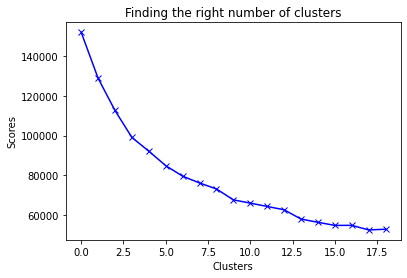

In [24]:
# Importing the KMeans clustering algorithm from the scikit-learn library

from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init = 'auto')
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# The following graph shows a continuous transition rather than a sharp elbow. Based on the results, let's choose the number of clusters as 5

In [25]:
# Creating the KMeans model with 5 clusters, and fitting the scaled dataset

kmeans = KMeans(n_clusters=5)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Important to note that the cluster information (ranging from 0 to 4) for all rows in the dataset (ie 8950 points) is captured in the labels as defined above 

In [41]:
print(f'Shape of labels: {labels.shape}')

Shape of labels: (8950,)


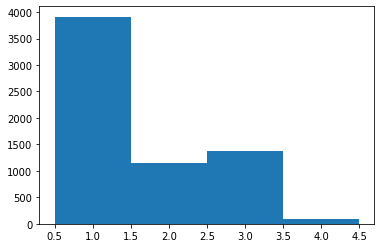

In [59]:
plt.hist(labels, bins=[0.5,1.5,2.5,3.5,4.5])
plt.show()

In [26]:
# The following code shows the shape of the clusters (i.e. the number of clusters and the number of parameters that define that cluster)

kmeans.cluster_centers_.shape

(5, 17)

In [27]:
# This calculates the centroids of the cluster_centers and prints them on screen
# Note that the values in table below are in scaled format (because of the use of StandardScaler() earlier) 

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.441404,0.105639,-0.096115,-0.256440,0.243816,-0.381893,0.912194,-0.398972,1.080896,-0.485297,-0.372129,0.077893,-0.356042,-0.275619,-0.074798,0.403708,-0.046513
1,-0.246779,-0.339398,-0.339031,-0.220898,-0.395667,-0.171390,-0.814682,-0.353873,-0.751613,-0.082293,-0.152860,-0.473096,-0.316631,-0.251299,-0.123163,-0.283943,-0.046351
2,1.466551,0.382502,-0.238739,-0.174952,-0.243170,1.737917,-0.522707,-0.241364,-0.458500,1.776962,1.670580,-0.295369,0.839270,0.641413,0.504904,-0.402845,-0.102454
3,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.682020,0.360735,-0.009076,0.382944,0.276932
4,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198396,4.783704,1.088343,0.824001,0.334613


In [28]:
labels.shape # Labels associated to each data point

(8950,)

### Applying Principal Component Analysis (PCA) to essentially compress the info from 17 features to 2 feautres for easy visualization in 2D plots


In [30]:
#Importing the PCA algorithm from the scikit-learn library

from sklearn.decomposition import PCA

In [31]:
# Creating an instance of the PCA class (with 2 components) and fitting and transforming the scaled dataset

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68367951, -1.07214378],
       [-1.13399277,  2.50921124],
       [ 0.96939161, -0.38358099],
       ...,
       [-0.92904404, -1.80798098],
       [-2.33786998, -0.65350674],
       [-0.55806013, -0.4006473 ]])

In [35]:
# Note that the inital (8950, 17) dataset is transformed to (8950,2) dataset
# essenitally indicating that the info from the 17 features in the original
# dataset has been compressed into just 2 features by the PCA algorithm

principal_comp.shape

(8950, 2)

In [32]:
# Create a dataframe with the two components

pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683680,-1.072144
1,-1.133993,2.509211
2,0.969392,-0.383581
3,-0.888582,0.003731
4,-1.600032,-0.683684


In [33]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683680,-1.072144,1
1,-1.133993,2.509211,2
2,0.969392,-0.383581,3
3,-0.888582,0.003731,1
4,-1.600032,-0.683684,1


<ipython-input-34-9ad18c43f7f4>:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])


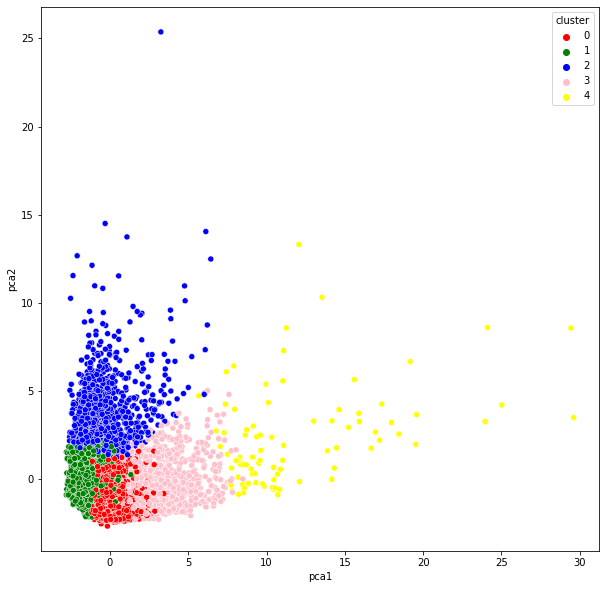

In [34]:
# Plotting the PCA data with colour coding of individual data points (representing individual customers)
# according to the cluster they belong to

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

### Above plot shows that the customers can be successfully segmented into 5 clusters. Subsequetly the Marketing Team can create targeted marketing campaigns, allowing for more efficient use of resources, and higher probability of campaign success.